In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [4]:
df = pd.read_csv("train_data.csv")
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
timestep = 1
scaling = False
selected_features = ["risk", "time_to_tca","c_time_lastob_end",
            "c_time_lastob_start", "mahalanobis_distance",
            "max_risk_estimate", "max_risk_scaling",
            "miss_distance", "c_sigma_t", "relative_velocity_t",
            "event_length" , "c_actual_od_span", "c_recommended_od_span", "relative_position_t","mission_id", "c_object_type"]


In [5]:
scaling = False
df = df.dropna(how='any')
def conditions(event):
    x = event["time_to_tca"].values
    return ((x.min()<3.0) & (x.max()>3.0))
df = df.groupby('event_id').filter(conditions)
y = df.groupby(['event_id'])['risk'].apply(lambda x: x.iloc[-1]).values.reshape(-1,1)
if(scaling):
    _ = Y_scaler.fit(df['risk'].values.reshape(-1,1))
    y = Y_scaler.transform(y)

df = df.loc[df['time_to_tca']>3.0]
df['event_length']=df.groupby('event_id')['event_id'].transform('count')
if scaling:
    df = pd.DataFrame(X_scaler.fit_transform(df), columns=df.columns)

features = list(df.columns)
X = pd.DataFrame(df)
for feature in features:
    for i in range(timestep-1,-1,-1):
        X[feature+"_t-"+str(i)] = df[feature].shift(i)
        X = X.groupby('event_id_t-0').apply(lambda x: x.iloc[-1])
        X = X.reset_index(drop=True)
for i in range(timestep):
    X = X.loc[X["event_id_t-"+str(i)] == X["event_id_t-0"]]

y = np.take(y, X.index)
y = y.reshape(-1,1)

event_features = [features for features in list(X.columns) if features.startswith("event_id_t-")]
X = X.drop(event_features, axis=1)

shifted_features = []

for feature in selected_features:
    for i in range(timestep):
        shifted_features.append(feature+"_t-"+str(i))
X = X[shifted_features]
X["target_risk"] = y
df = X
df["mission_id_t-0"] = df["mission_id_t-0"].astype('category')
df["c_object_type_t-0"] = df["c_object_type_t-0"].astype('category')
df

        

,risk_t-0,time_to_tca_t-0,c_time_lastob_end_t-0,c_time_lastob_start_t-0,mahalanobis_distance_t-0,max_risk_estimate_t-0,max_risk_scaling_t-0,miss_distance_t-0,c_sigma_t_t-0,relative_velocity_t_t-0,event_length_t-0,c_actual_od_span_t-0,c_recommended_od_span_t-0,relative_position_t_t-0,mission_id_t-0,c_object_type_t-0,target_risk
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.693361
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.544394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.147276
4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.542724
4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.000000
4875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.000000


C:\Users\karan\AppData\Local\Temp\ipykernel_9824\692792823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.catplot(x=col, kind="count", data=df, palette="Set3")
C:\Users\karan\AppData\Local\Temp\ipykernel_9824\692792823.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xmajorticklabels(), rotation=90, fontsize = 13)
C:\Users\karan\AppData\Local\Temp\ipykernel_9824\692792823.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_ymajorticklabels(), fontsize = 13)


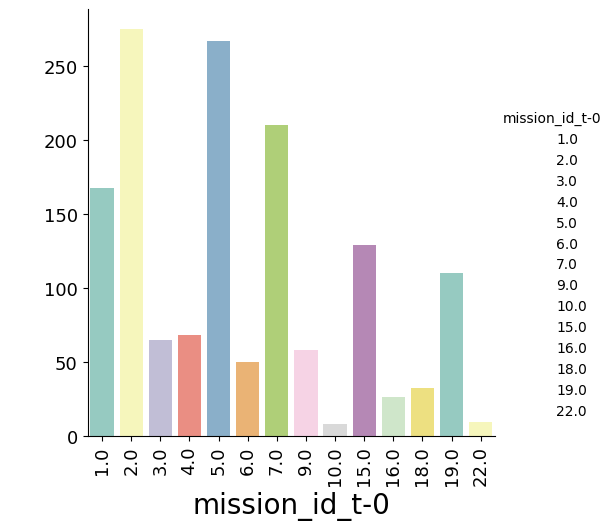

C:\Users\karan\AppData\Local\Temp\ipykernel_9824\692792823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.catplot(x=col, kind="count", data=df, palette="Set3")
C:\Users\karan\AppData\Local\Temp\ipykernel_9824\692792823.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xmajorticklabels(), rotation=90, fontsize = 13)
C:\Users\karan\AppData\Local\Temp\ipykernel_9824\692792823.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_ymajorticklabels(), fontsize = 13)


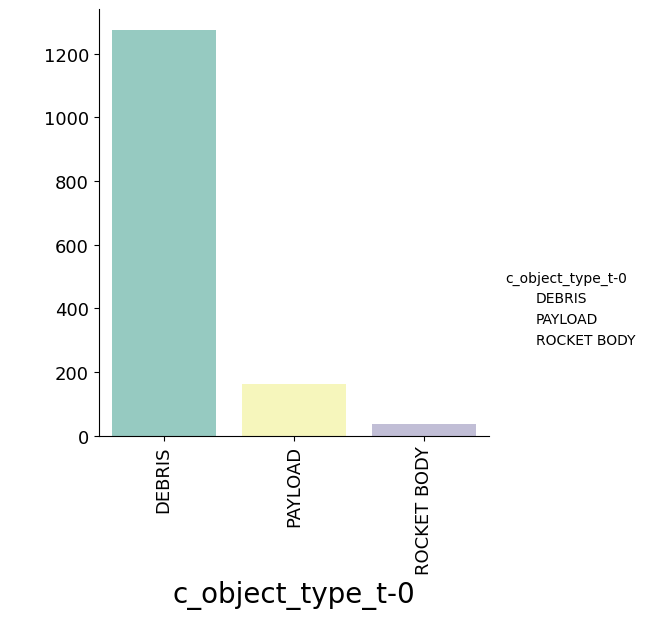

In [6]:
for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, palette="Set3")
        axes = fig.axes.flatten()
        axes[0].set_xlabel(col,fontsize=20)
        axes[0].set_ylabel(" ",fontsize=20)
        axes[0].set_xticklabels(axes[0].get_xmajorticklabels(), rotation=90, fontsize = 13)
        axes[0].set_yticklabels(axes[0].get_ymajorticklabels(), fontsize = 13)        
        plt.show()

In [13]:
df.describe()

,risk_t-0,time_to_tca_t-0,c_time_lastob_end_t-0,c_time_lastob_start_t-0,mahalanobis_distance_t-0,max_risk_estimate_t-0,max_risk_scaling_t-0,miss_distance_t-0,c_sigma_t_t-0,relative_velocity_t_t-0,event_length_t-0,c_actual_od_span_t-0,c_recommended_od_span_t-0,relative_position_t_t-0,target_risk
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03,1475.000000,1.475000e+03,1475.000000,1475.000000,1475.000000,1475.000000,1475.00000,4877.000000
mean,-16.106350,4.869651,0.560678,38.640678,98.607263,-6.048312,1.061017e+03,15083.023729,4.049637e+05,-9174.892068,10.861695,12.205763,12.683905,587.12461,-27.177947
std,9.526901,1.141758,0.815937,72.795822,123.994189,1.074791,6.318977e+03,13031.312471,4.967556e+06,4606.448849,2.189122,8.815998,10.437651,13385.93010,6.772222
min,-30.000000,3.000676,0.000000,1.000000,0.000033,-8.743763,5.581740e-10,56.000000,4.769764e+01,-15185.300000,1.000000,0.140000,1.410000,-43738.00000,-30.000000
25%,-30.000000,3.863294,0.000000,1.000000,16.389242,-6.899457,5.773534e+00,4463.500000,2.243397e+03,-13275.000000,11.000000,6.570000,6.640000,-4446.75000,-30.000000
50%,-13.078366,4.821231,0.000000,1.000000,52.149367,-6.026272,1.744883e+01,11310.000000,6.059513e+03,-9820.100000,12.000000,10.980000,11.460000,297.40000,-30.000000
75%,-7.874194,5.864322,1.000000,2.000000,129.474476,-5.338709,6.103873e+01,22659.000000,1.343719e+04,-5498.000000,12.000000,16.350000,16.410000,5888.90000,-30.000000
max,-3.235749,6.990684,2.000000,180.000000,1052.928483,-3.035034,1.279260e+05,57997.000000,6.378136e+07,-268.500000,13.000000,80.650000,109.650000,41911.10000,-3.913996


In [20]:
df_corr = df.corr()
df_corr = df_corr.loc[df_corr["target_risk"]>=0.5]

ValueError: could not convert string to float: 'DEBRIS'

In [19]:
plt.figure(figsize=(8,8))
hm = sns.heatmap(df.corr(),cmap="Blues", annot=False)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 15)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 15)        
plt.show()

ValueError: could not convert string to float: 'DEBRIS'

<Figure size 800x800 with 0 Axes>